In [66]:
import torch
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [67]:
%matplotlib inline

In [68]:
states = torch.load(feats_path)

In [69]:
xy_emb = states[0]['embeddings.18'][0,...].to('cpu')
yz_emb = states[0]['embeddings.19'][0,...].to('cpu')
xz_emb = states[0]['embeddings.20'][0,...].to('cpu')
xy_emb.shape, yz_emb.shape, xz_emb.shape

(torch.Size([8, 155, 155]),
 torch.Size([8, 155, 155]),
 torch.Size([8, 155, 155]))

In [80]:
def plot_animation(data, saving_name, interval=800):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation,PillowWriter

    # Example tensor with shape [16, 155, 155]
    # Replace this with your actual tensor data
    tensor = data

    # Set up the figure and axes
    fig, ax = plt.subplots()
    fig.tight_layout(pad=1.0)
    
    im = ax.imshow(tensor[0], animated=True, cmap='viridis')  # Example colormap
    frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color="red", fontsize=16)

    # Set the title of the plot
    # ax.set_title("Frame 0")  # Initial title

    def animate(i):
        # Update the image data and frame number text
        im.set_data(tensor[i])
        frame_text.set_text(f'Frame {i}')
        # ax.set_title(f"Frame {i}")  # Update the title for each frame
        return im, frame_text

    # Create the animation
    anim = FuncAnimation(fig, animate, frames=len(tensor), interval=interval, blit=True)

    anim.save(f'{saving_name}.gif', writer="pillow")

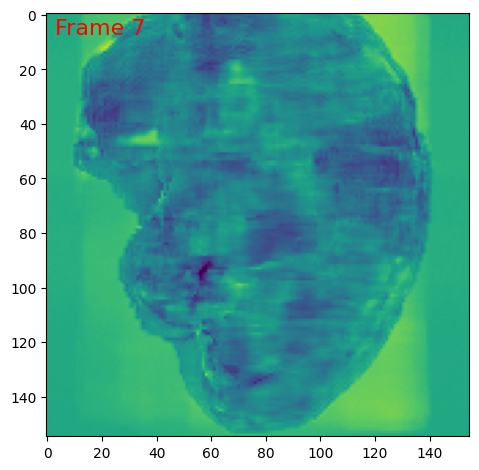

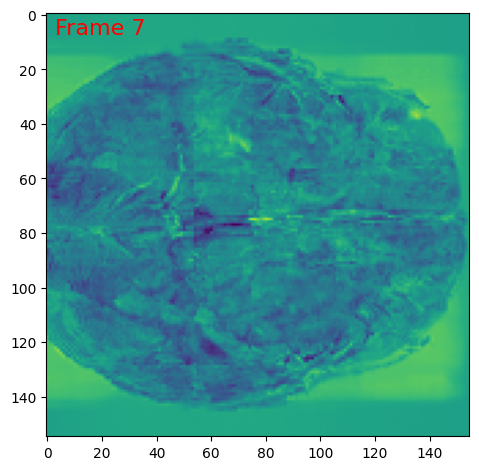

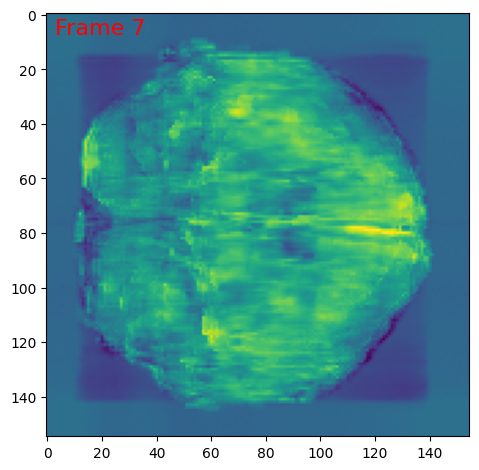

In [81]:
plot_animation(xy_emb, "8_xy")
plot_animation(yz_emb, "8_yz")
plot_animation(xz_emb, "8_xz")